# MODELING

## Exercises
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data

# module for visualizations
import viz_kmeans as vk

# my imports
import wrangle_original as wo

### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
tr, val, ts = wo.get_split(df)
tr.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
87,6.7,3.1,4.7,1.5,versicolor
83,5.8,2.7,3.9,1.2,versicolor
110,7.2,3.6,6.1,2.5,virginica
148,6.5,3.0,5.2,2.0,virginica
50,5.0,3.3,1.4,0.2,setosa


In [4]:
new_col_name = []

for col in tr.columns:
    new_col_name.append(col.lower().replace('.', '_'))

tr.columns = new_col_name

tr.head()

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.7,3.1,4.7,1.5,versicolor
83,5.8,2.7,3.9,1.2,versicolor
110,7.2,3.6,6.1,2.5,virginica
148,6.5,3.0,5.2,2.0,virginica
50,5.0,3.3,1.4,0.2,setosa


In [5]:
# define independent variables for k-means

Xtr = tr[['petal_width', 'sepal_width']]
Xtr.head()

,petal_width,sepal_width
87,1.5,3.1
83,1.2,2.7
110,2.5,3.6
148,2.0,3.0
50,0.2,3.3


### Create and fit cluster model

In [6]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(Xtr)

# USE (predict using) the thing 
kmeans.predict(Xtr)

array([0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 2], dtype=int32)

In [7]:
# make a new column names cluster in iris and Xtr dataframe

tr['cluster'] = kmeans.predict(Xtr)

Xtr['cluster'] = kmeans.predict(Xtr)

tr.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
87,6.7,3.1,4.7,1.5,versicolor,0
83,5.8,2.7,3.9,1.2,versicolor,0
110,7.2,3.6,6.1,2.5,virginica,2


In [8]:
tr.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.011111,3.392593,1.477778,0.259259,1.000000
versicolor,5.947059,2.791176,4.235294,1.323529,0.176471
virginica,6.551724,2.975862,5.558621,2.017241,1.724138


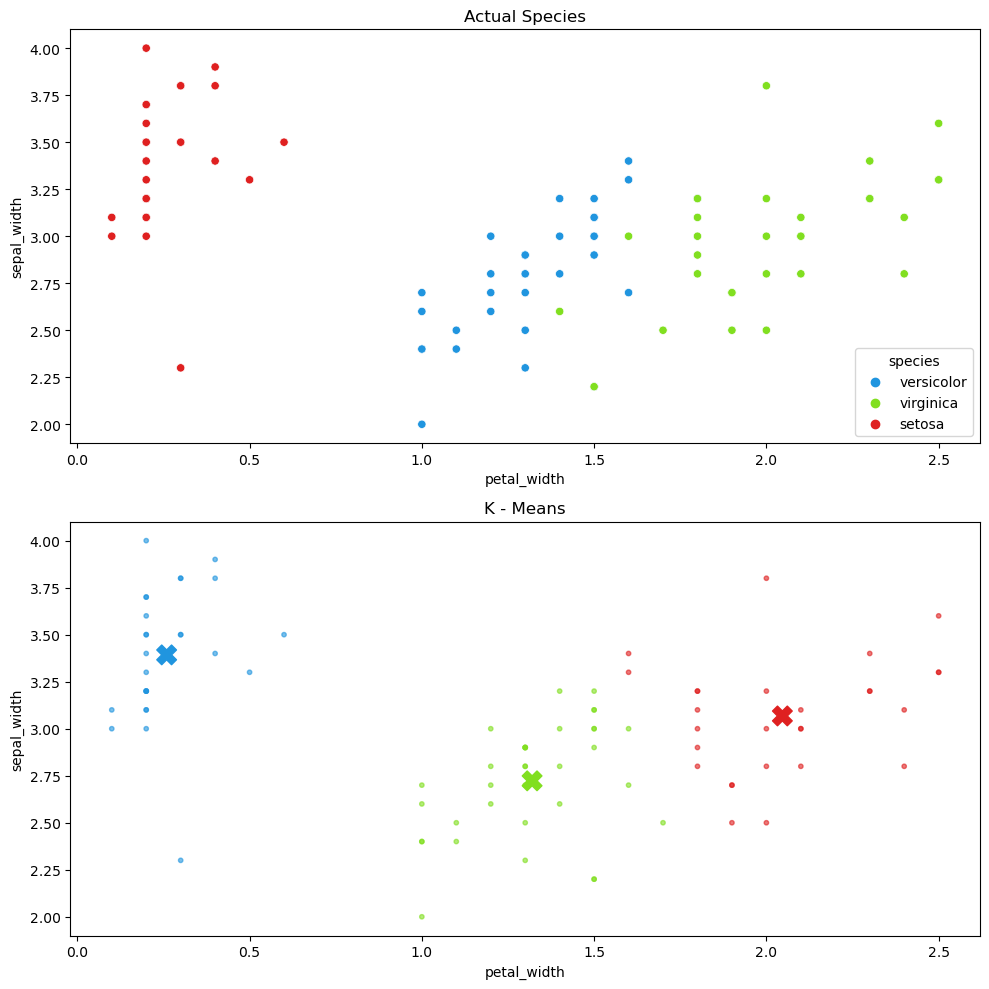

In [9]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
vk.viz_iris(tr)

In [10]:
kmeans.inertia_

12.452132275132275

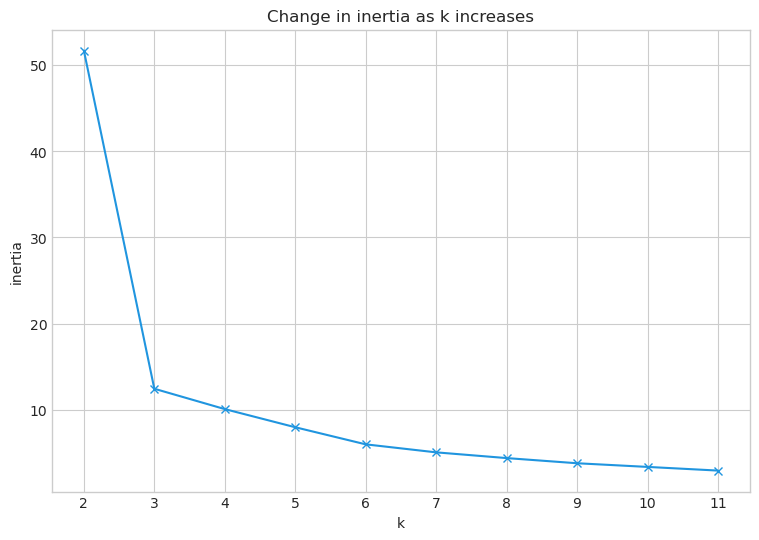

In [11]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Xtr).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

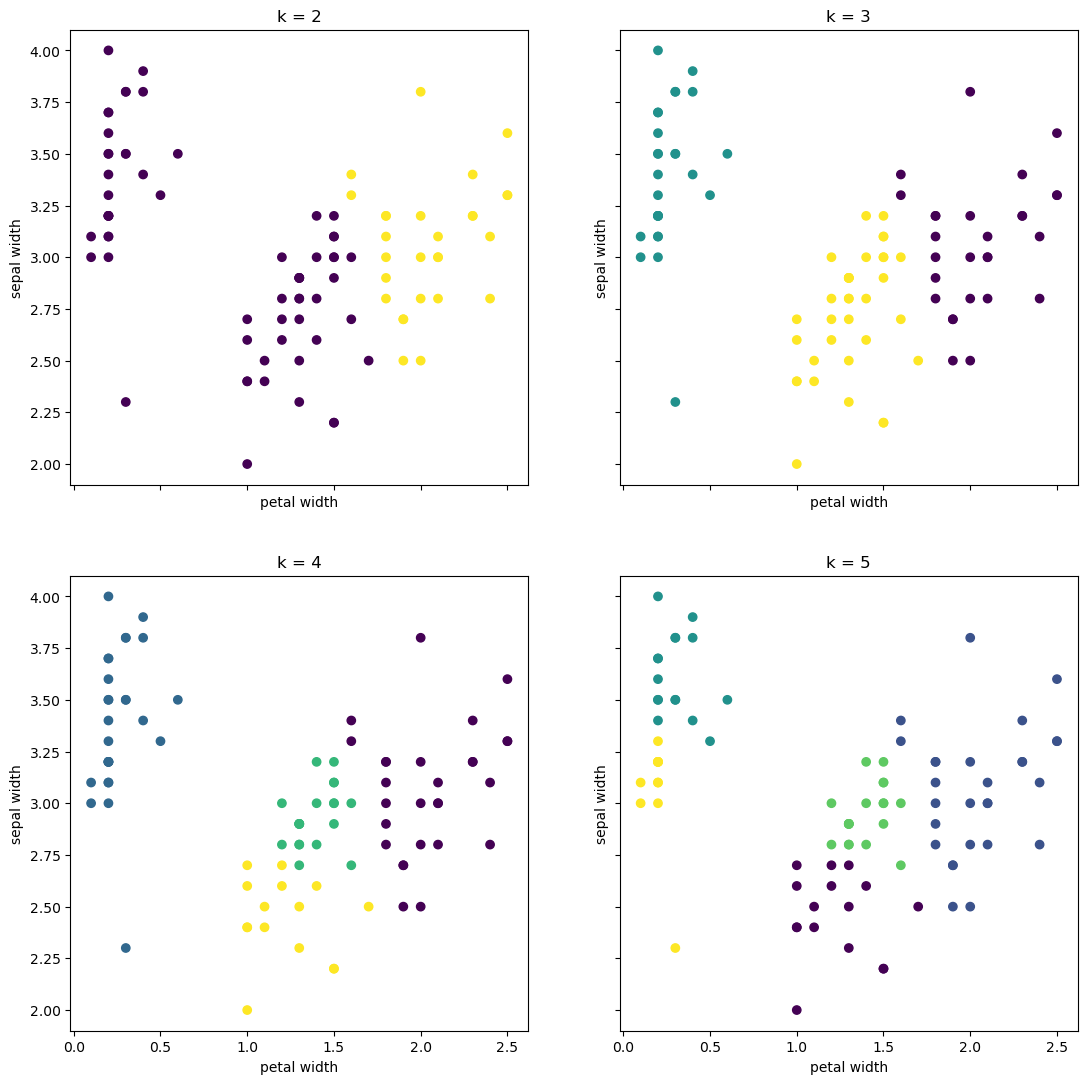

In [12]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(Xtr).predict(Xtr)
    
    ax.scatter(Xtr.petal_width, Xtr.sepal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')

###  d. Repeat the clustering, this time with 3 different features.

In [13]:
# define independent variables for k-means
tr_3 = tr.copy()
Xtr_3 = tr_3[['petal_width', 'sepal_width','sepal_length']]
Xtr_3.head()

,petal_width,sepal_width,sepal_length
87,1.5,3.1,6.7
83,1.2,2.7,5.8
110,2.5,3.6,7.2
148,2.0,3.0,6.5
50,0.2,3.3,5.0


In [14]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(Xtr_3)

# USE (predict using) the thing 
kmeans.predict(Xtr_3)

array([2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1,
       0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       1, 0], dtype=int32)

In [15]:
# make a new column names cluster in iris and X dataframe

tr_3['cluster'] = kmeans.predict(Xtr_3)

Xtr_3['cluster'] = kmeans.predict(Xtr_3)

tr_3.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
87,6.7,3.1,4.7,1.5,versicolor,2
83,5.8,2.7,3.9,1.2,versicolor,0
110,7.2,3.6,6.1,2.5,virginica,2


In [16]:
tr_3.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.011111,3.392593,1.477778,0.259259,1.000000
versicolor,5.947059,2.791176,4.235294,1.323529,0.470588
virginica,6.551724,2.975862,5.558621,2.017241,1.310345


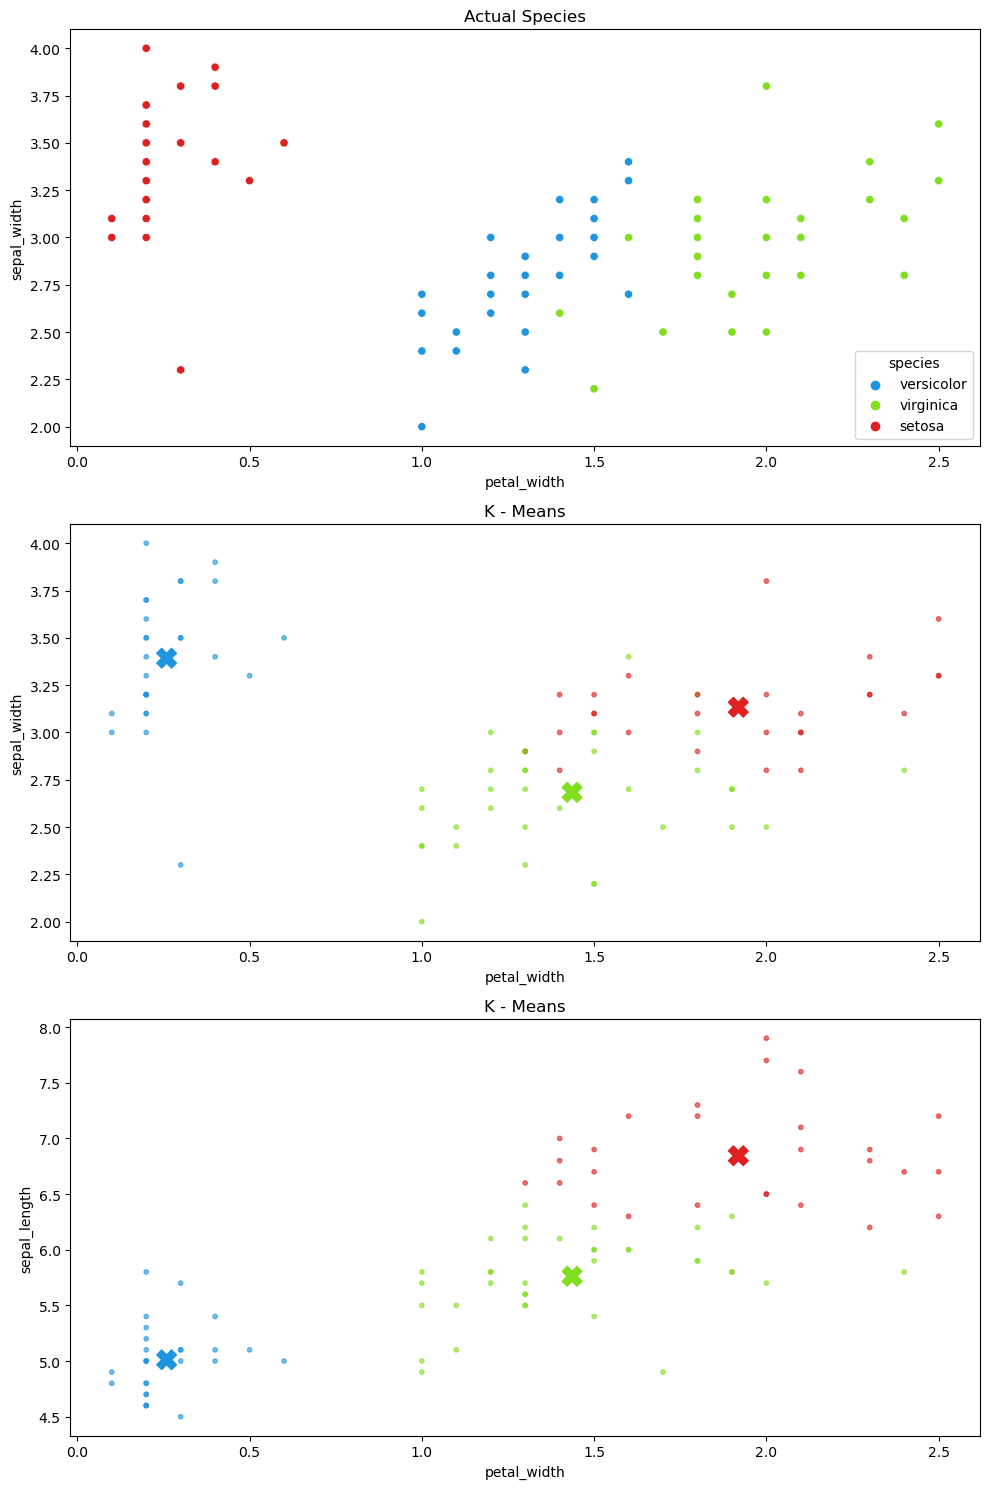

In [17]:
# # Visualize the scatter plot for Actual vs predicted (K-Means)
#     # Get centroids' coordinates
#     centroids = np.array(iris.groupby('cluster')['petal_width', 'sepal_width','sepal_length'].mean())
#     cen_x = [i[0] for i in centroids]
#     cen_y = [i[1] for i in centroids]

#     # Add centroids' coordinates into new columns in local df
#     iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#     iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

#     # Creates new column in local df to map distinct cluster colors
#     colors = ['#81DF20' ,'#2095DF','#DF2020']
#     iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#     #specify custom palette for sns scatterplot
#     colors1 = ['#2095DF','#81DF20' ,'#DF2020']
#     customPalette = sns.set_palette(sns.color_palette(colors1))

#     # Plot the scatterplots

#     #Define figure (num of rows, columns and size)
#     fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

#     # plot ax1 
#     ax1 = plt.subplot(2,1,1) 
#     sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', ax = ax1, hue = 'species', palette=customPalette)
#     plt.title('Actual Species')

#     #plot ax2
#     ax2 = plt.subplot(2,1,2) 
#     ax2.scatter(iris.petal_width, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
#     ax2.set(xlabel = 'petal_width', ylabel = 'sepal_width', title = 'K - Means')

#     # plot centroids on  ax2
#     ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
#     iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
#     plt.tight_layout()
#     plt.show()
    
    
    
    
# Visualize the scatter plot for Actual vs predicted (K-Means)
# Get centroids' coordinates
centroids = np.array(tr_3.groupby('cluster')['petal_width', 'sepal_width', 'sepal_length'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# Add centroids' coordinates into new columns in local df
tr_3['cen_x'] = tr_3.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
tr_3['cen_y'] = tr_3.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

# Creates new column in local df to map distinct cluster colors
colors = ['#81DF20', '#2095DF', '#DF2020']
tr_3['c'] = tr_3.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

# Specify custom palette for sns scatterplot
colors1 = ['#2095DF', '#81DF20', '#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

# Plot the scatterplots

# Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot ax1
ax1 = plt.subplot(3, 1, 1)
sns.scatterplot(data=tr_3, x='petal_width', y='sepal_width', ax=ax1, hue='species', palette=customPalette)
plt.title('Actual Species')

# Plot ax2
ax2 = plt.subplot(3, 1, 2)
ax2.scatter(tr_3.petal_width, tr_3.sepal_width, c=tr_3.c, alpha=0.6, s=10)
ax2.set(xlabel='petal_width', ylabel='sepal_width', title='K - Means')

# Plot centroids on ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)

# Plot ax3
ax3 = plt.subplot(3, 1, 3)
ax3.scatter(tr_3.petal_width, tr_3.sepal_length, c=tr_3.c, alpha=0.6, s=10)
ax3.set(xlabel='petal_width', ylabel='sepal_length', title='K - Means')

# Plot centroids on ax3
ax3.scatter(cen_x, tr_3.groupby('cluster')['sepal_length'].mean(), marker='X', c=colors, s=200)

# Remove the added columns
tr_3.drop(columns=['cen_x', 'cen_y', 'c'], inplace=True)

plt.tight_layout()
plt.show()

In [18]:
# kmeans.inertia_

inertia_list_3f = []

for k in range(2, 13):
    kmeans = KMeans(k)
    kmeans.fit(Xtr)
    inertia_list_3f.append(kmeans.inertia_)

inertia_list_3f

[51.6805529953917,
 12.452132275132275,
 10.091161410470622,
 7.986124373433584,
 5.981660087719299,
 5.066192721751933,
 4.503978207782556,
 3.821123321123321,
 3.3967970085470083,
 2.9567261904761906,
 2.593365800865801]

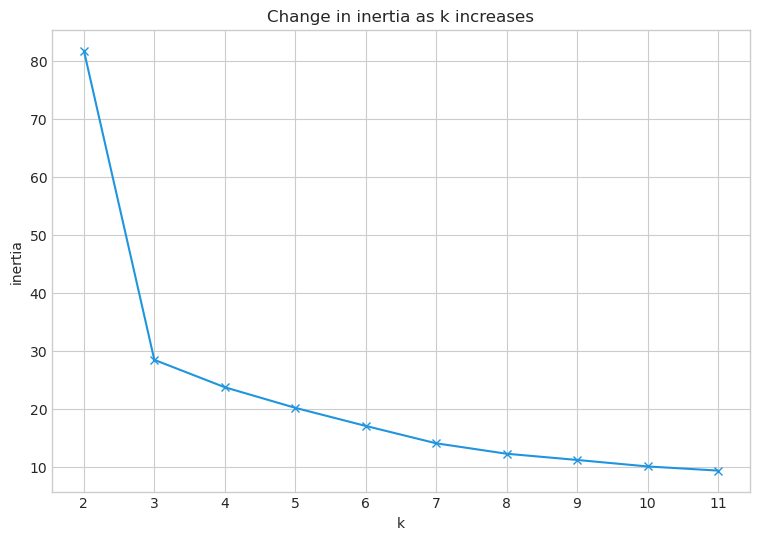

In [19]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Xtr_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

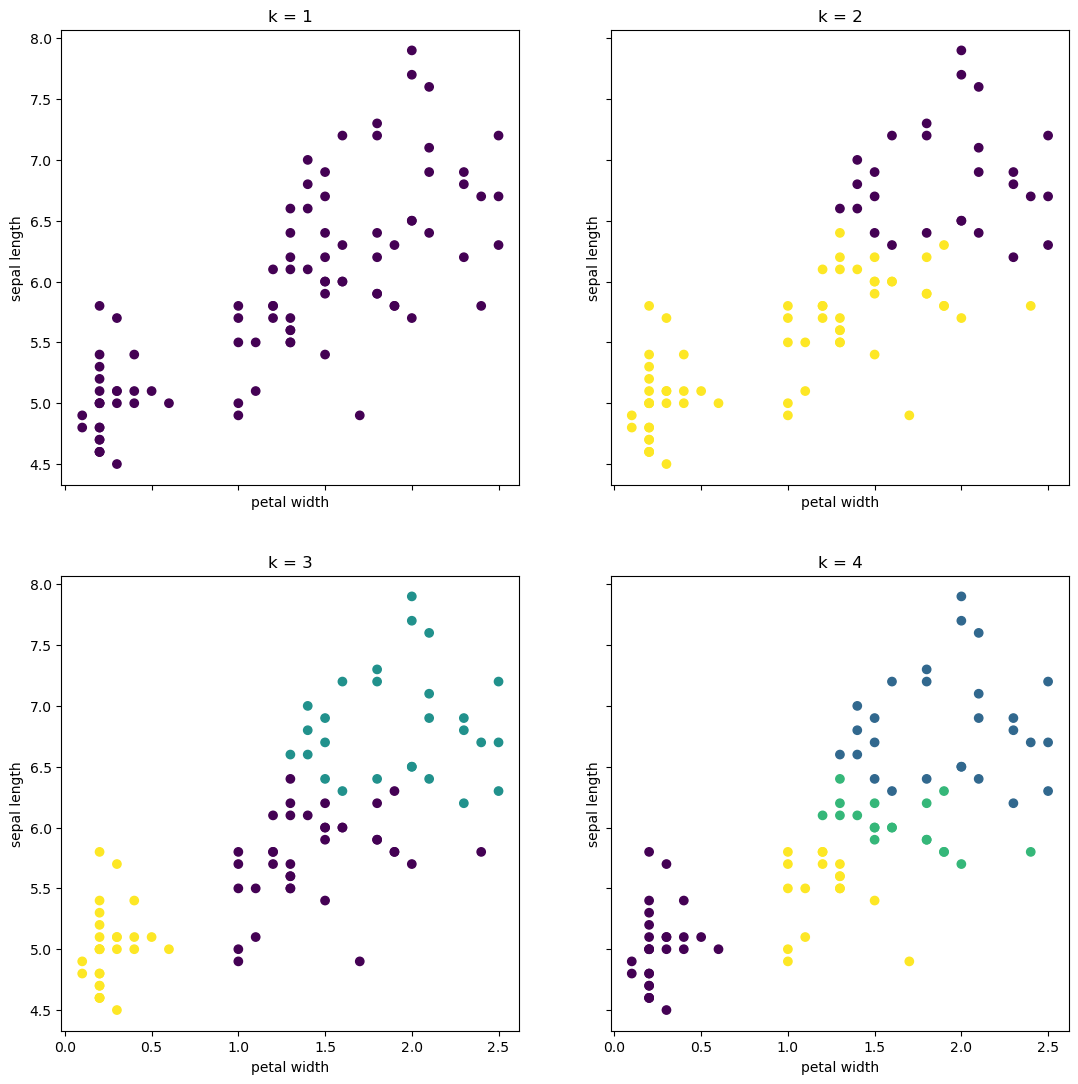

In [20]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(1, 5)):
    clusters = KMeans(k).fit(Xtr_3).predict(Xtr_3)
    ax.scatter(Xtr_3.petal_width, Xtr_3.sepal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal length')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [21]:
mall_df = wo.get_mallcustomer_data()
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [22]:
# get dummies and concat to the dataframe
dummy_tips = pd.get_dummies(mall_df[['gender']], dummy_na=False, drop_first=[True, True])
mall_df = pd.concat([mall_df, dummy_tips], axis=1)

# after getting the dummies drop the county column
mall_df = mall_df.drop(columns =['gender'])

In [23]:
mall_df.head()

,age,annual_income,spending_score,gender_Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [24]:
tr_m, val_m, ts_m = wo.get_split(mall_df)
tr_m.head()

,age,annual_income,spending_score,gender_Male
customer_id,,,,
64,54,47,59,0
49,29,40,42,0
25,54,28,14,0
137,44,73,7,0
177,58,88,15,1


In [25]:
# define independent variables for k-means
mall_df_X = tr_m[['age','annual_income']]
mall_df_X.head()

,age,annual_income
customer_id,,
64,54,47
49,29,40
25,54,28
137,44,73
177,58,88


In [26]:
# MAKE the thing
kmeans = KMeans(n_clusters=5)

# FIT the thing
kmeans.fit(mall_df_X)

# USE (predict using) the thing 
kmeans.predict(mall_df_X)

array([0, 2, 0, 1, 1, 4, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 1,
       4, 4, 4, 3, 0, 1, 3, 2, 0, 0, 0, 3, 1, 1, 3, 2, 2, 0, 1, 2, 3, 0,
       1, 2, 4, 0, 1, 3, 4, 4, 1, 2, 1, 4, 3, 2, 0, 1, 4, 4, 2, 1, 1, 1,
       0, 3, 1, 3, 4, 4, 1, 0, 1, 0, 2, 2, 1, 4, 1, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 2, 3, 2, 2, 0, 0, 2, 4, 2, 1, 1, 0, 1, 0, 4, 1, 1, 3, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 4, 2], dtype=int32)

In [27]:
# make a new column names cluster in iris and X dataframe

tr_m['cluster'] = kmeans.predict(mall_df_X)

# mall_df_X['cluster'] = kmeans.predict(mall_df_X)

tr_m.head(3)

,age,annual_income,spending_score,gender_Male,cluster
customer_id,,,,,
64,54,47,59,0,0
49,29,40,42,0,2
25,54,28,14,0,0


In [28]:
tr_m.groupby('spending_score').mean()

,age,annual_income,gender_Male,cluster
spending_score,,,,
1,37.000000,78.000000,1.000000,1.000000
5,33.000000,49.000000,0.500000,3.000000
6,35.000000,18.000000,0.000000,2.000000
7,44.000000,73.000000,0.000000,1.000000
9,47.000000,71.000000,1.000000,1.000000
10,19.000000,74.000000,1.000000,4.000000
13,37.000000,20.000000,1.000000,2.000000
14,56.666667,26.666667,0.333333,0.000000
15,58.000000,54.000000,0.500000,0.500000


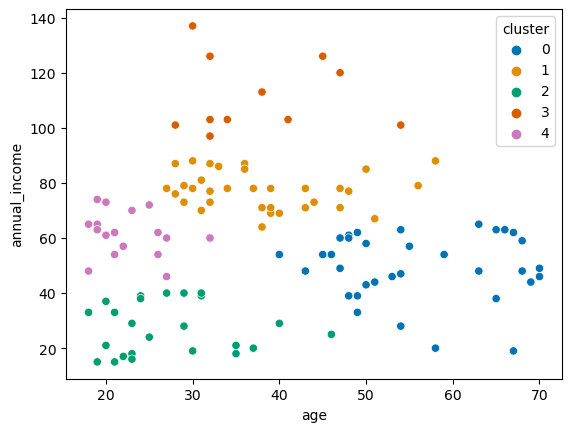

In [29]:
#Visualize the results

sns.scatterplot(x='age', y='annual_income', hue='cluster', palette='colorblind', data=tr_m)
plt.show()

In [30]:
kmeans.inertia_

18435.49342373313

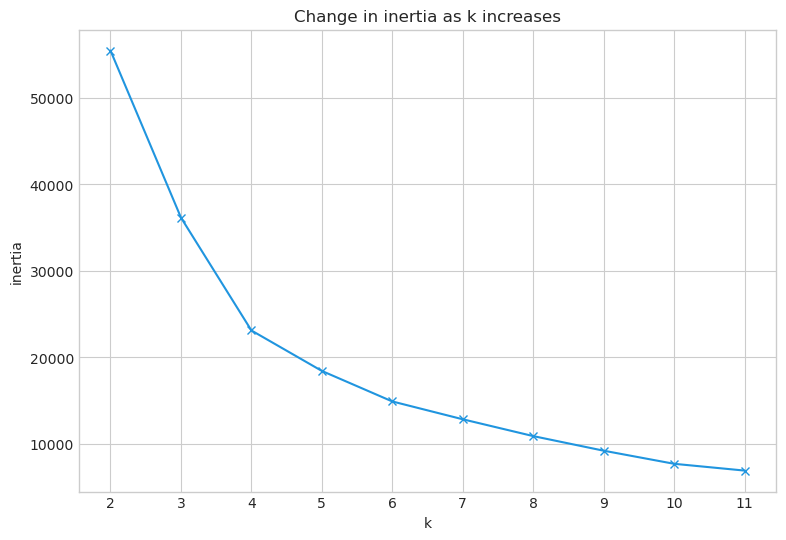

In [31]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(mall_df_X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

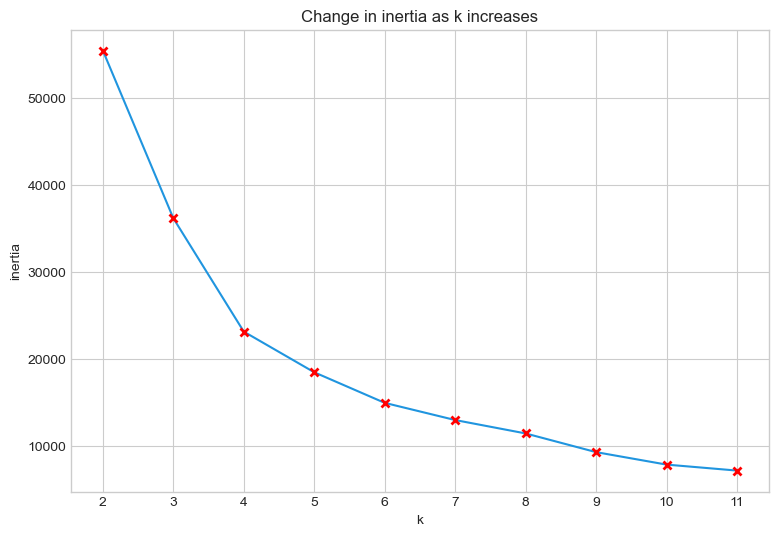

In [32]:
# lets plot inertia vs k

plt.style.use('seaborn-whitegrid')  # Set the grid style
plt.figure(figsize=(9, 6))

pd.Series({k: KMeans(k).fit(mall_df_X).inertia_ for k in range(2, 12)}).plot(marker='x',markeredgewidth=2, markeredgecolor='red')

plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.show()

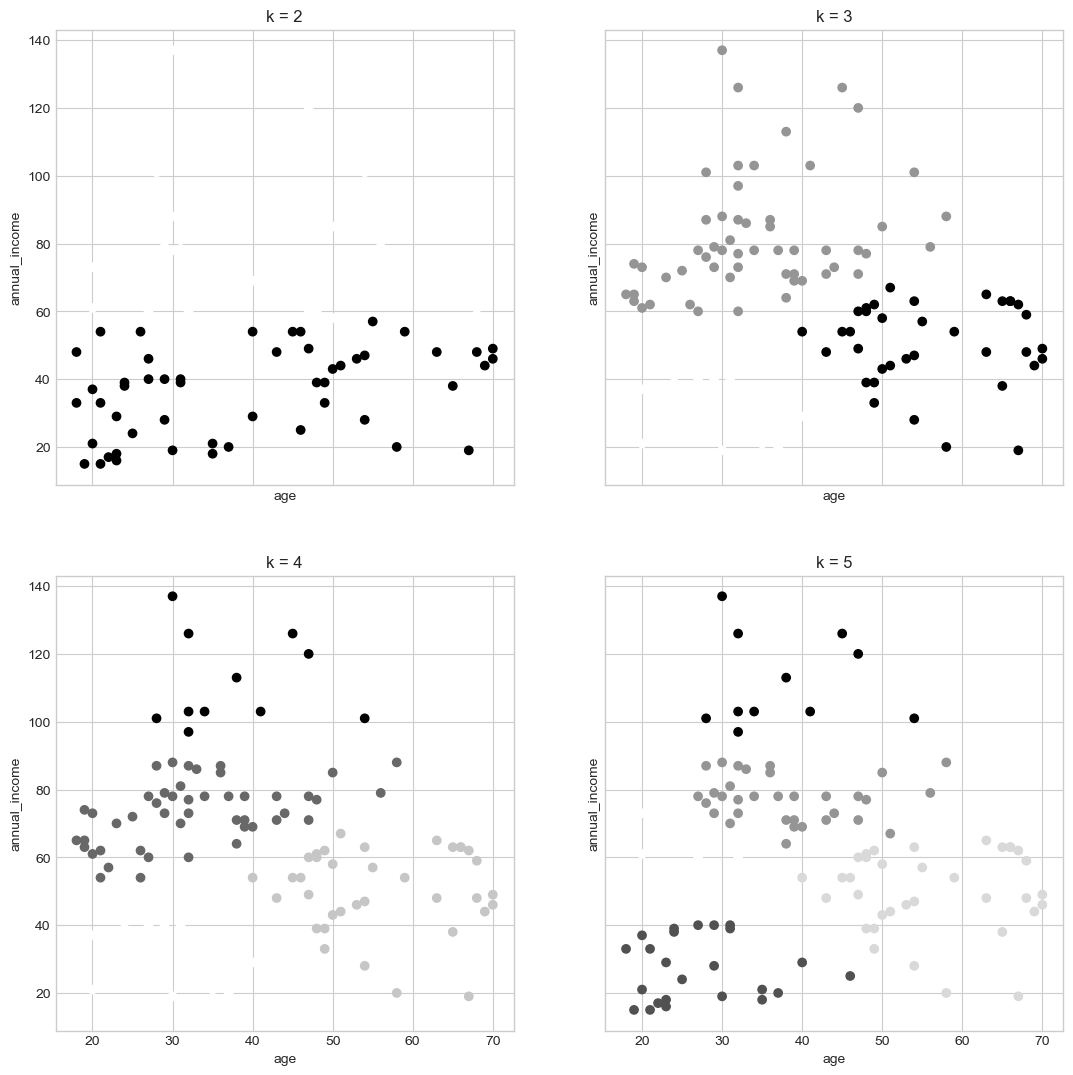

In [33]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(mall_df_X).predict(mall_df_X)
    ax.scatter( tr_m.age,tr_m.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [34]:
#Create a copy of my original dataframe to scale
mall_df_sc = tr_m.copy()

In [35]:
#Create an instance of the scaler and fit/transform the same features I used before
mms = MinMaxScaler()

mall_df_sc[['age', 'annual_income']] = mms.fit_transform(mall_df_sc[['age','annual_income']])

mall_df_sc.head()

,age,annual_income,spending_score,gender_Male,cluster
customer_id,,,,,
64,0.692308,0.262295,59,0,0
49,0.211538,0.204918,42,0,2
25,0.692308,0.106557,14,0,0
137,0.500000,0.475410,7,0,1
177,0.769231,0.598361,15,1,1


In [36]:
#Subset these scaled features for training
Xtrm_sc = mall_df_sc[['age','annual_income']]
Xtrm_sc.head()

,age,annual_income
customer_id,,
64,0.692308,0.262295
49,0.211538,0.204918
25,0.692308,0.106557
137,0.500000,0.475410
177,0.769231,0.598361


In [37]:
# fit a new model to my scaled data

# make the thing
kmeans_scale = KMeans(5)

# fit the thing
kmeans_scale.fit(Xtrm_sc)

# use the thing
kmeans_scale.predict(Xtrm_sc)

array([1, 0, 3, 1, 1, 4, 3, 1, 1, 1, 2, 3, 0, 0, 1, 3, 4, 1, 3, 0, 0, 1,
       4, 4, 4, 2, 1, 4, 2, 0, 3, 1, 3, 2, 1, 2, 2, 0, 0, 1, 4, 0, 2, 1,
       1, 0, 4, 3, 2, 2, 4, 4, 1, 0, 4, 4, 2, 0, 1, 1, 4, 4, 0, 1, 4, 1,
       1, 2, 1, 1, 4, 4, 1, 1, 4, 3, 0, 0, 2, 4, 2, 3, 3, 1, 1, 0, 0, 4,
       0, 1, 0, 2, 0, 0, 1, 3, 0, 4, 0, 4, 2, 1, 2, 1, 0, 4, 1, 2, 1, 3,
       1, 2, 3, 3, 3, 2, 1, 2, 4, 1], dtype=int32)

In [38]:
# store the results in a new column
mall_df_sc['cluster'] = kmeans_scale.predict(Xtrm_sc)
mall_df_sc.head()

,age,annual_income,spending_score,gender_Male,cluster
customer_id,,,,,
64,0.692308,0.262295,59,0,1
49,0.211538,0.204918,42,0,0
25,0.692308,0.106557,14,0,3
137,0.500000,0.475410,7,0,1
177,0.769231,0.598361,15,1,1


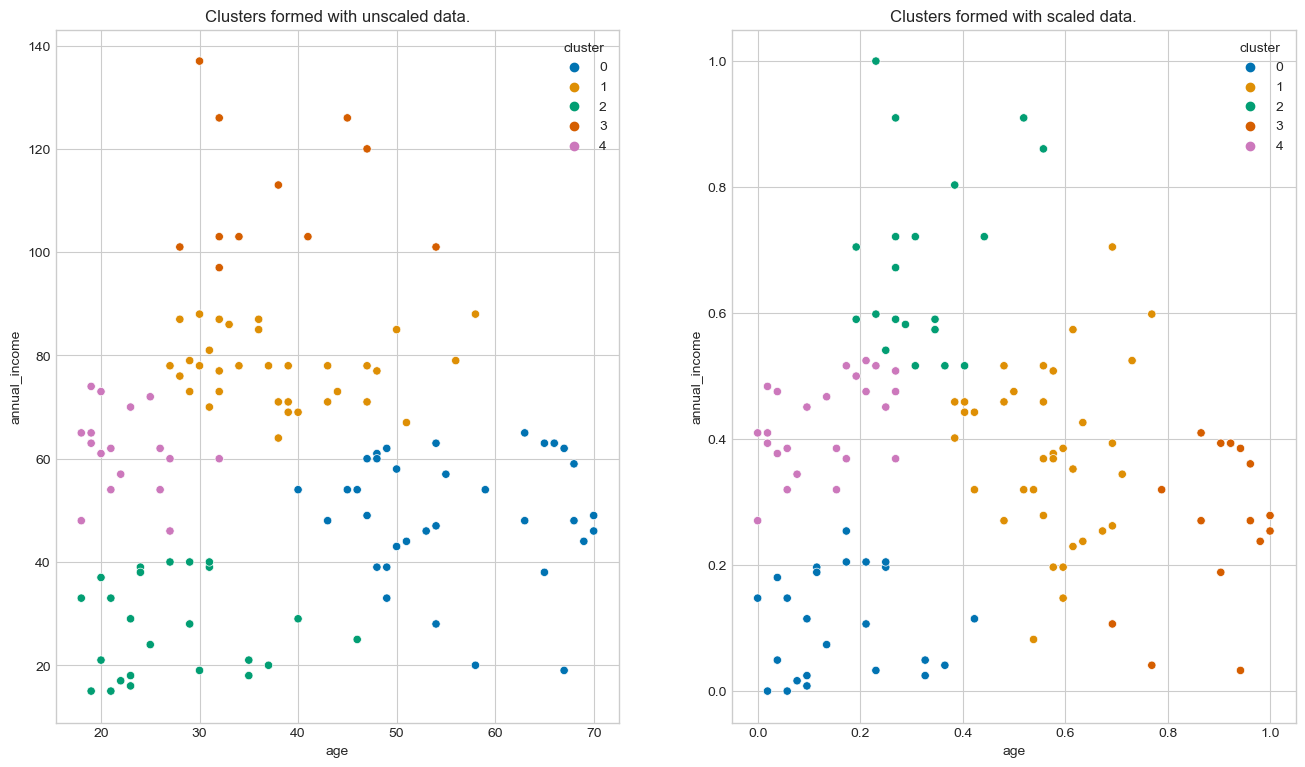

In [39]:
#Compare the clusters generated by scaled and unscaled data
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=tr_m)
axes[0].set_title('Clusters formed with unscaled data.')

sns.scatterplot(ax=axes[1], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df_sc)
axes[1].set_title('Clusters formed with scaled data.')

plt.show()